In [1]:
#read vaccination progress csv file into python
#load required packages
import pandas as pd #Dataframes
import numpy as np # Random samples
import urllib.request # Unzip file
from urllib.request import urlopen # Unzip file
from zipfile import ZipFile # Unzip file
import datetime # Incase datetime needs configuring
import plotly.graph_objects as go # Graphing
from plotly.subplots import make_subplots # Graphing
import plotly.express as px # Graphing

In [2]:
#download vacc prog data from github into working environment
#to download directly from kaggle API would allow for more up to date data to be collected (but would require username and password authentication)
import requests, zipfile, io
print('downloading file')
zip_file_url = 'https://github.com/AlexHumfrey/Python_Coursework/raw/main/archive%20(1).zip'
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

downloading file


In [3]:
# Includes two filepaths

#read in csv data into pandas dataframe from local filepath after zip download
filepath = '/Users/alexhumfrey/Documents/Loughborough/Semester 2 Modules/Python_Coursework/country_vaccinations.csv'
vac_prog_data = pd.read_csv(filepath)

#Read unzipped csv data from github to avoid any local filepaths and repeated file downloads 
vac_prog_data = pd.read_csv('https://raw.githubusercontent.com/AlexHumfrey/Python_Coursework/main/country_vaccinations.csv')


In [5]:
# dataset summary

print(type(vac_prog_data))
#print(df.head())
#print(df.tail())

print(list(vac_prog_data))

#random sample of 5 rows from dataframe
print(vac_prog_data.sample(n=5, random_state = 1))

# select rows and columns to view
#vac_prog_data.iloc[10:20,10:14]

print(vac_prog_data.info)

print(vac_prog_data.shape)



<class 'pandas.core.frame.DataFrame'>
['country', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'vaccines', 'source_name', 'source_website']
             country iso_code        date  total_vaccinations  \
2751         Denmark      DNK  2021-03-27           1045576.0   
10512         Uganda      UGA  2021-04-05            138064.0   
5930   Liechtenstein      LIE  2021-02-08                 NaN   
7815          Panama      PAN  2021-02-16             12441.0   
7273         Nigeria      NGA  2021-03-19                 NaN   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
2751            680465.0                 365111.0                 13134.0   
10512           138064.0                      NaN                  8430.0   
5930 

In [29]:
#rename df columns
#df.rename(columns={'text','TEXT'}, inplace=TRUE)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [7]:
#select columns to work with for our purposes
#specify chunks of columns, last number in the range not included in the generated list of numbers

vac_prog_data2 = vac_prog_data.iloc[:,np.r_[0:4, 8]]

vac_prog_data2.head()

,country,iso_code,date,total_vaccinations,total_vaccinations_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0
1,Afghanistan,AFG,2021-02-23,NaN,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN


In [9]:
#summary statistics of a specific column
vac_prog_data2[["country"]].describe()

,country
count,11156
unique,176
top,Canada
freq,119


In [10]:
vac_prog_country = vac_prog_data2.groupby(['country'])

/Users/alexhumfrey/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


country
Afghanistan    AxesSubplot(0.125,0.125;0.775x0.755)
Albania        AxesSubplot(0.125,0.125;0.775x0.755)
Algeria        AxesSubplot(0.125,0.125;0.775x0.755)
Andorra        AxesSubplot(0.125,0.125;0.775x0.755)
Angola         AxesSubplot(0.125,0.125;0.775x0.755)
                               ...                 
Uzbekistan     AxesSubplot(0.125,0.125;0.775x0.755)
Venezuela      AxesSubplot(0.125,0.125;0.775x0.755)
Vietnam        AxesSubplot(0.125,0.125;0.775x0.755)
Wales          AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe       AxesSubplot(0.125,0.125;0.775x0.755)
Length: 176, dtype: object

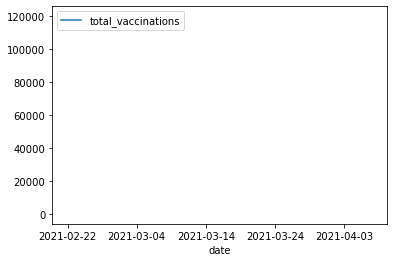

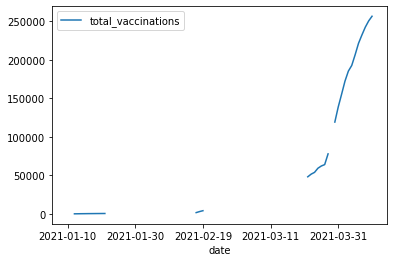

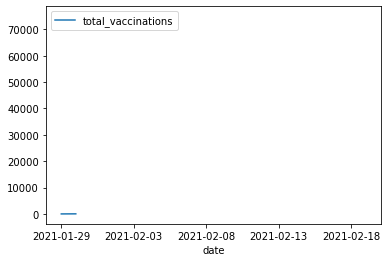

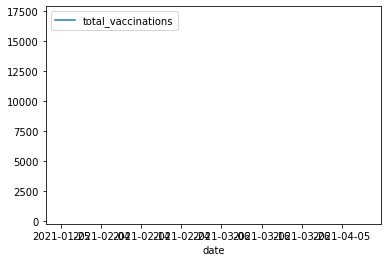

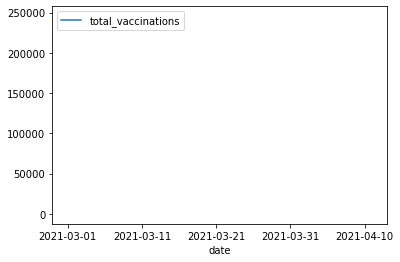

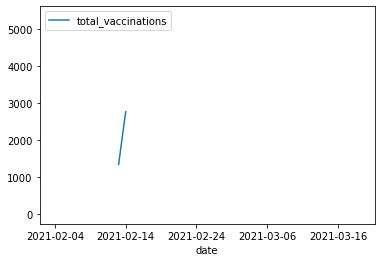

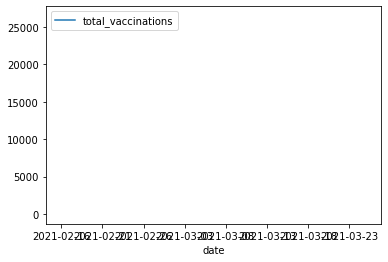

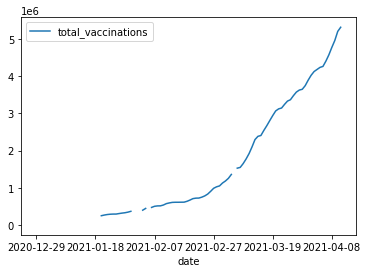

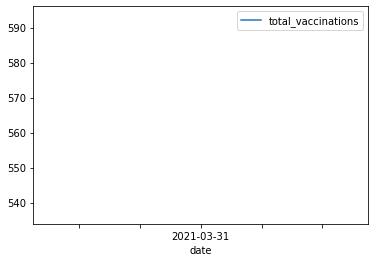

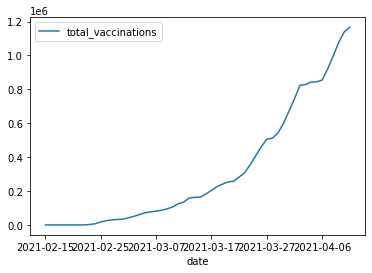

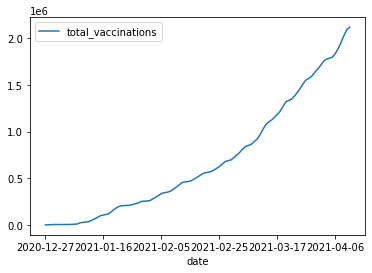

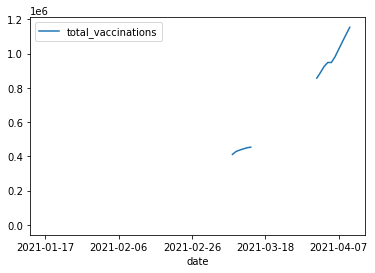

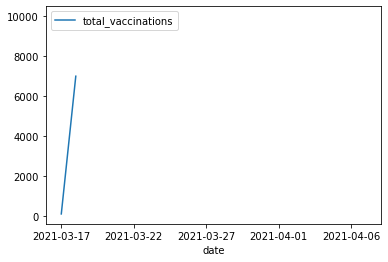

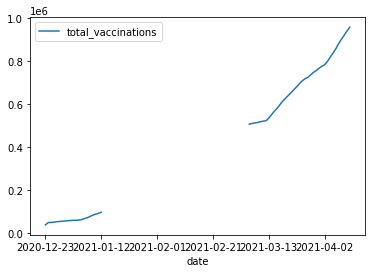

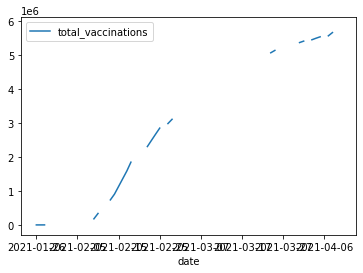

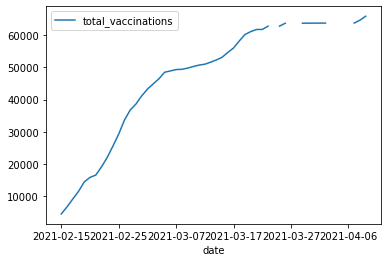

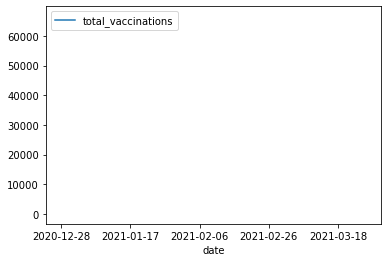

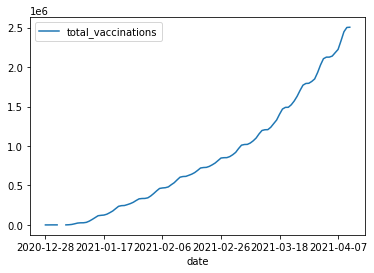

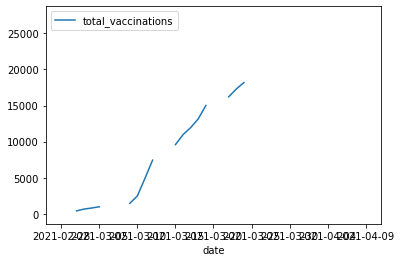

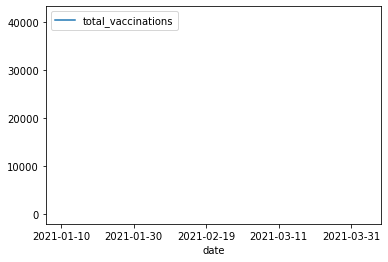

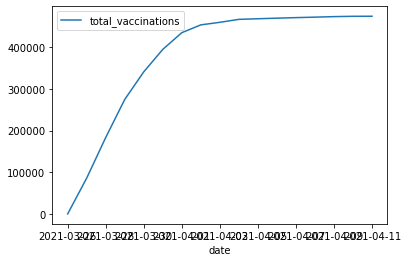

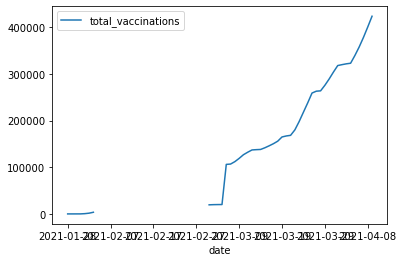

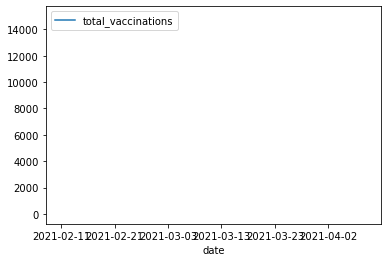

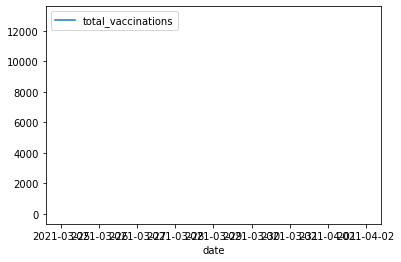

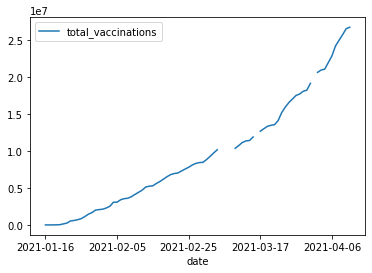

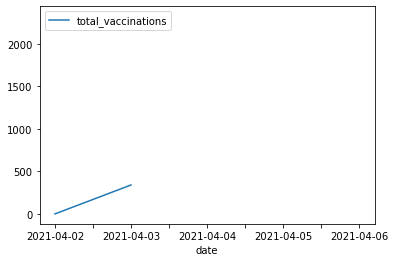

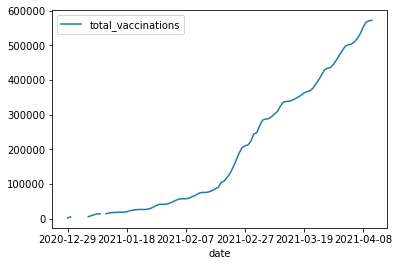

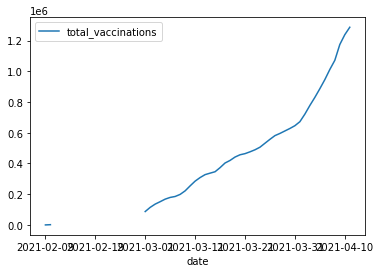

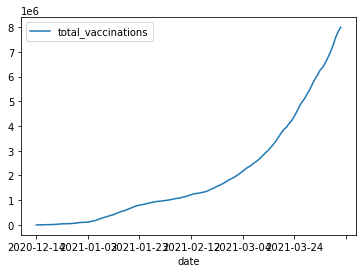

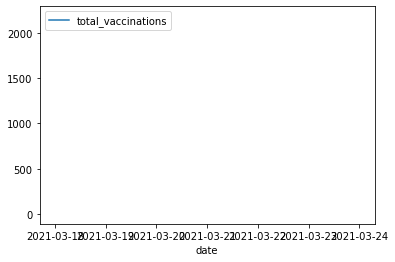

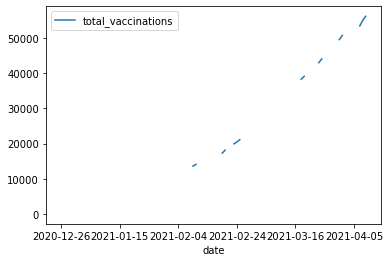

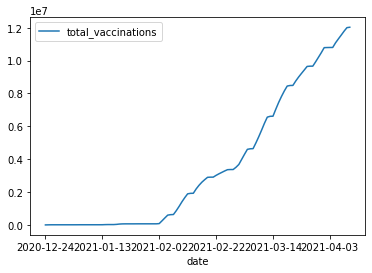

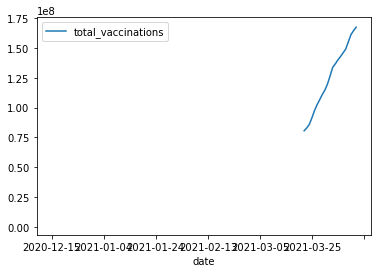

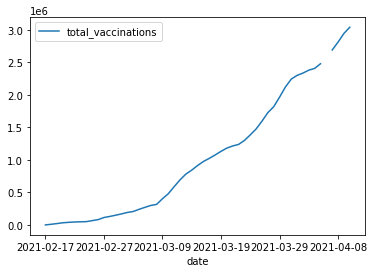

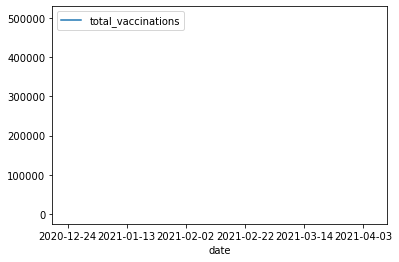

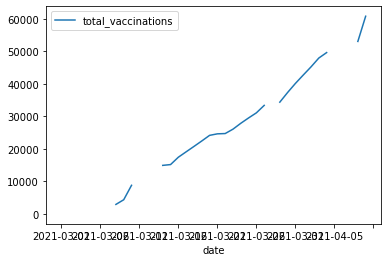

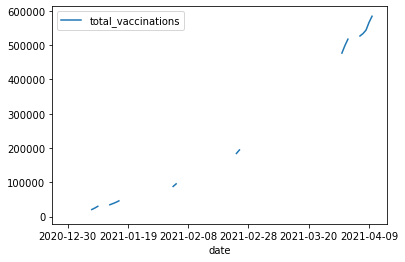

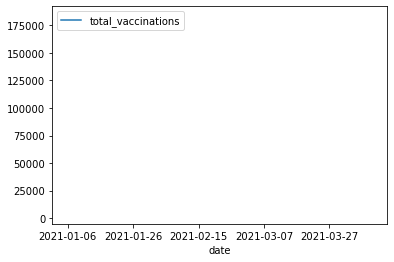

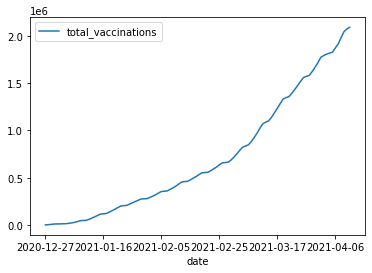

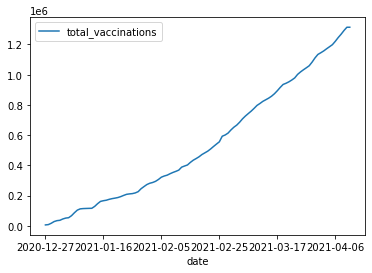

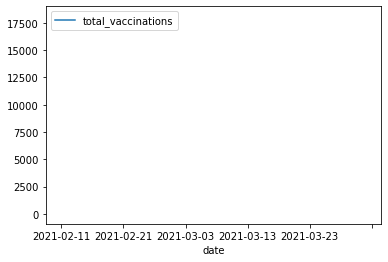

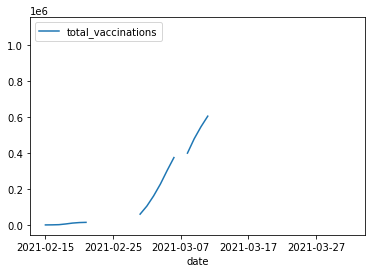

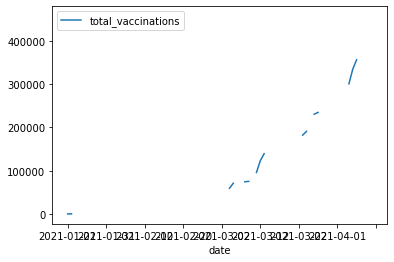

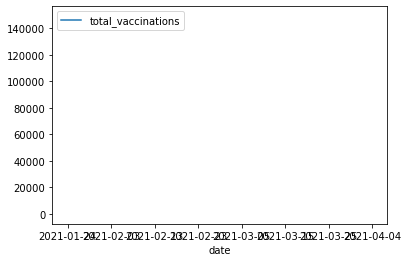

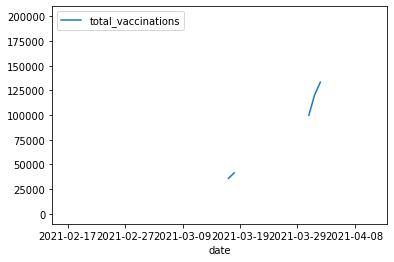

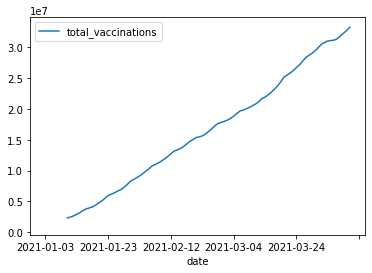

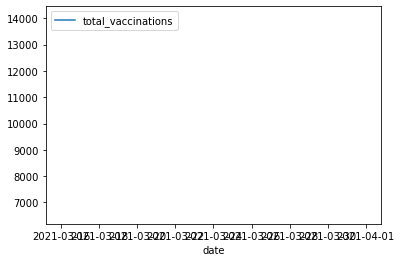

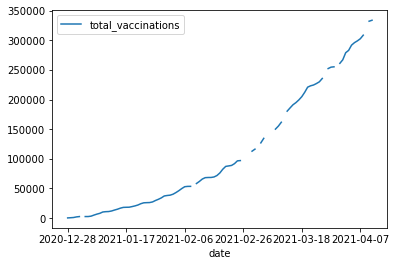

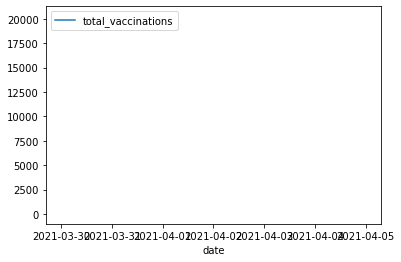

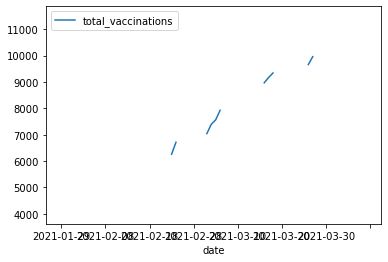

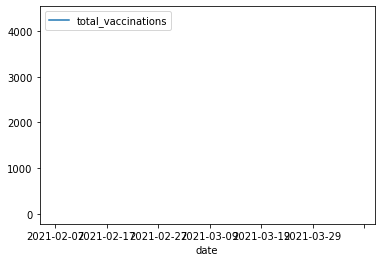

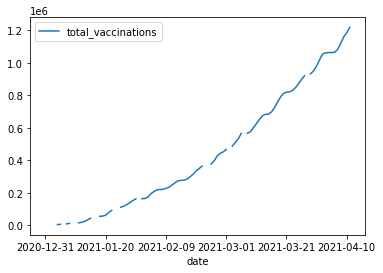

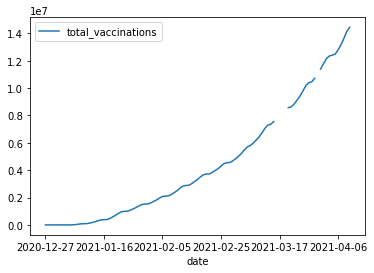

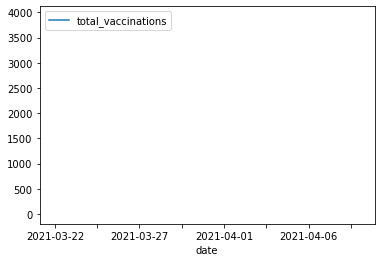

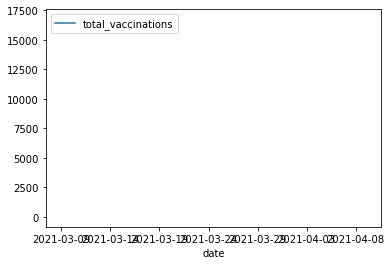

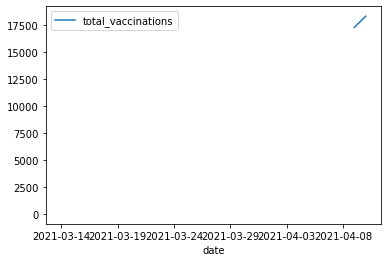

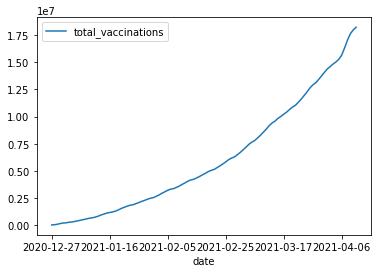

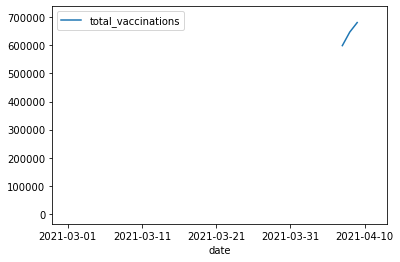

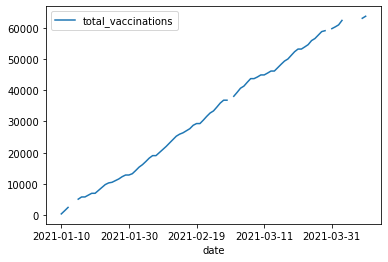

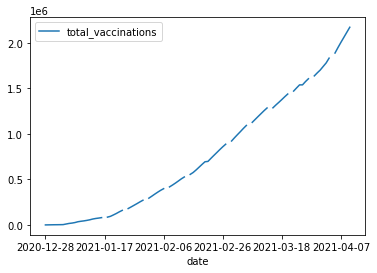

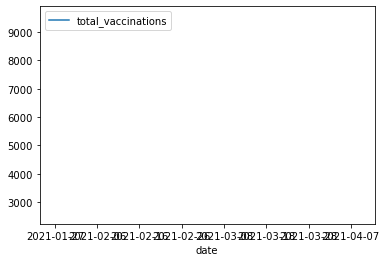

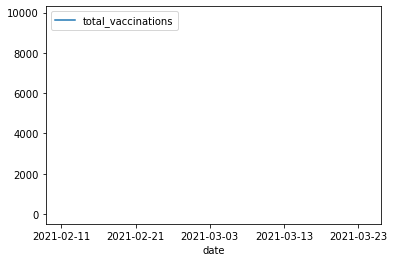

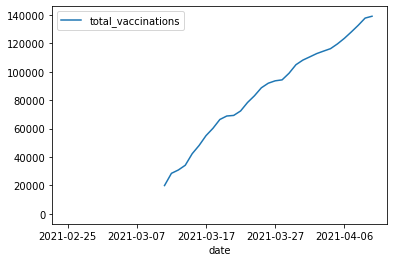

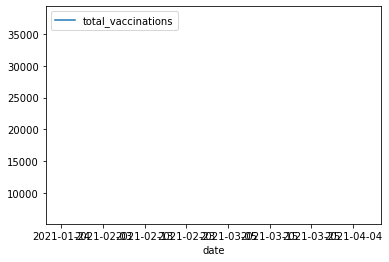

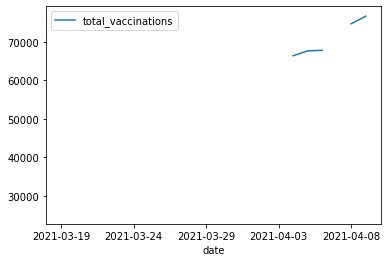

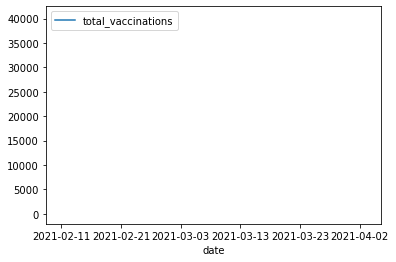

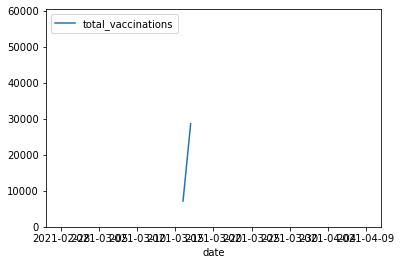

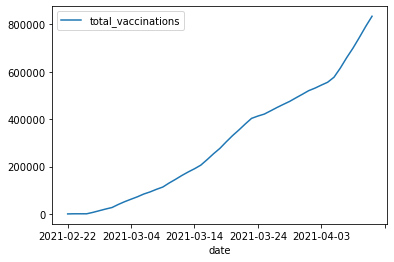

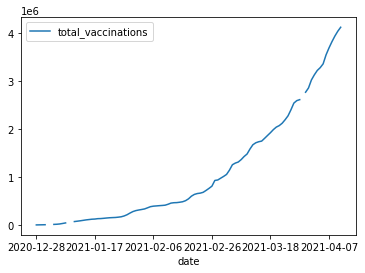

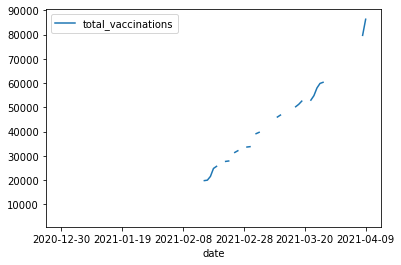

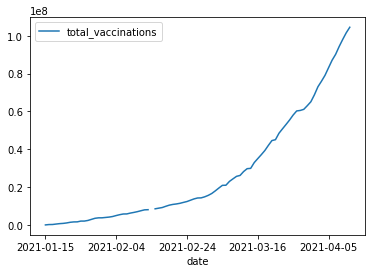

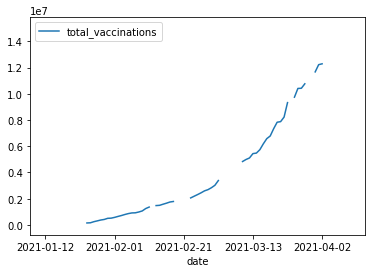

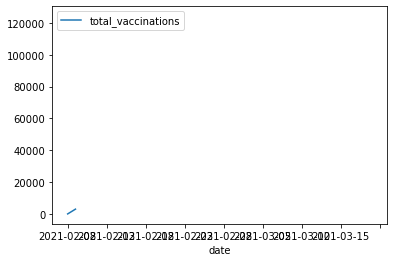

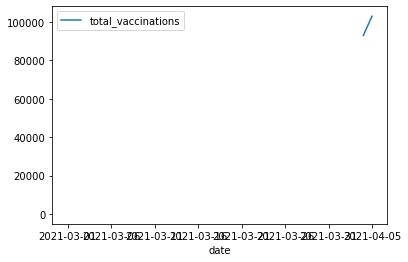

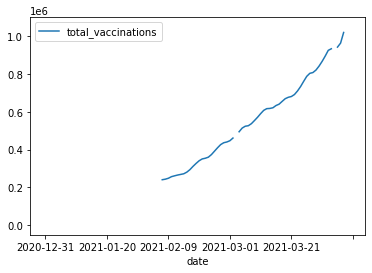

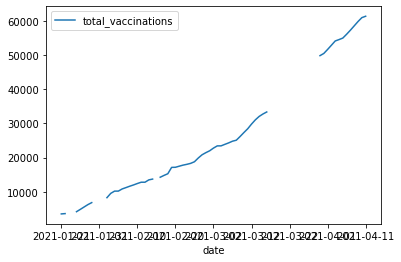

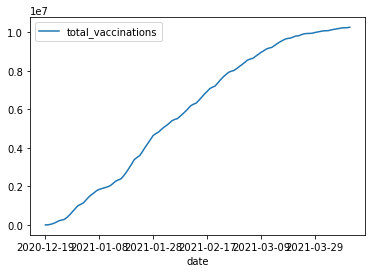

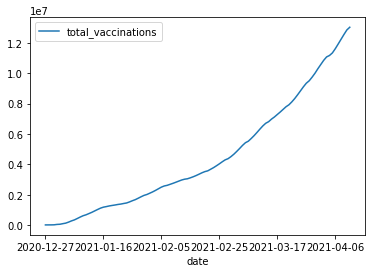

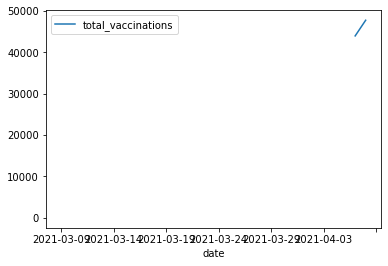

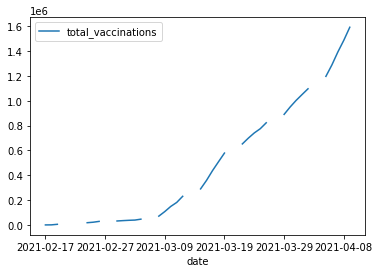

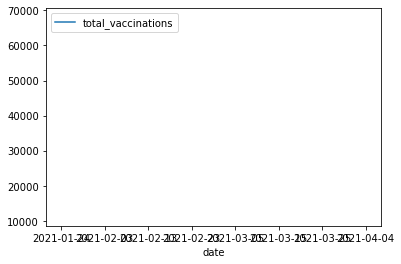

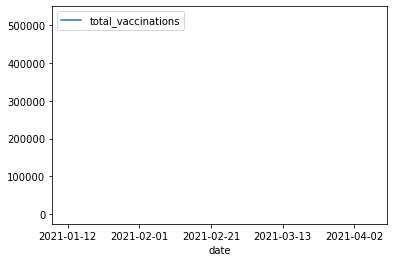

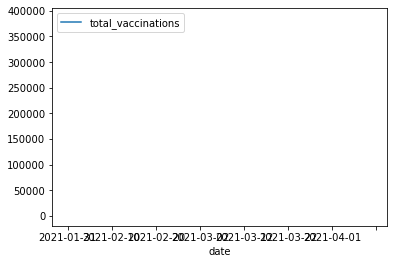

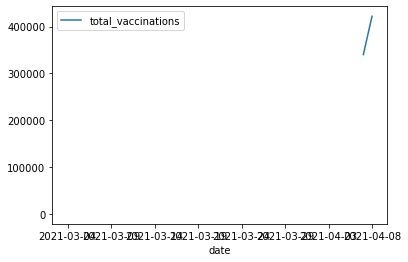

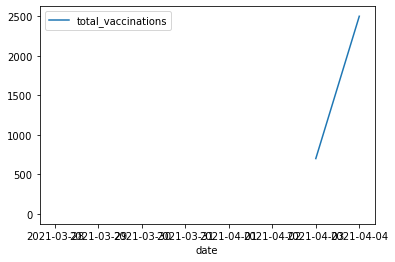

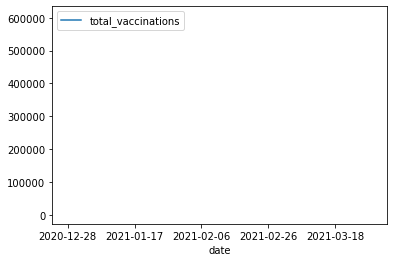

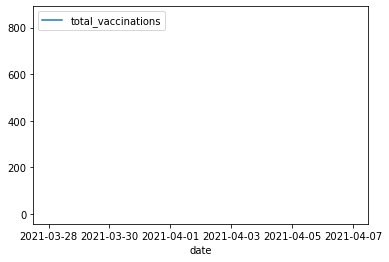

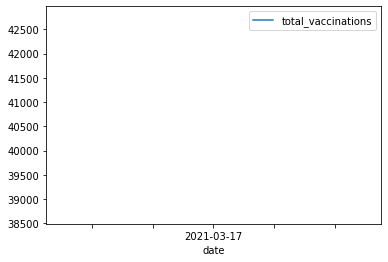

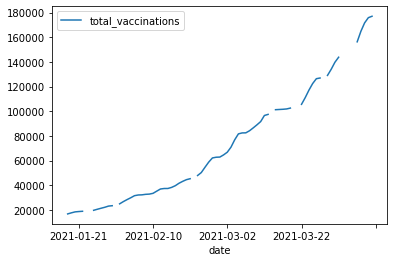

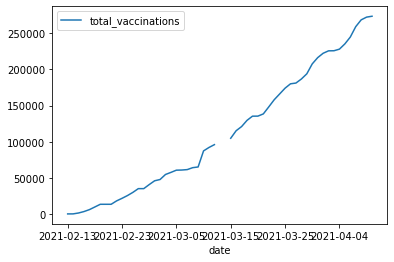

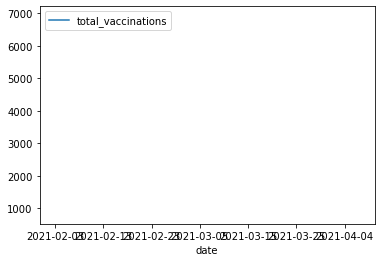

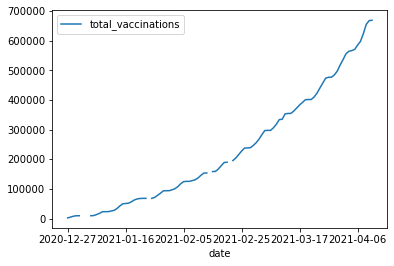

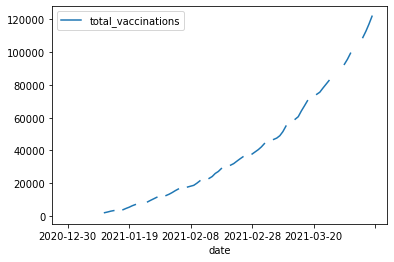

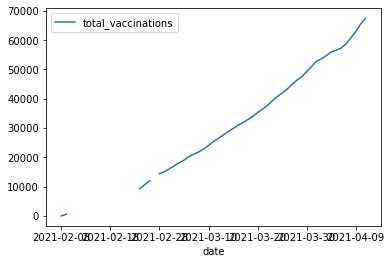

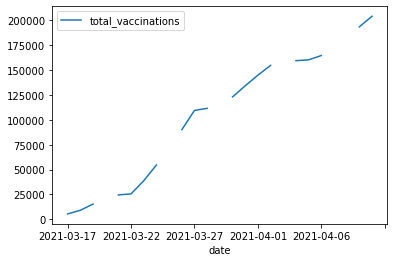

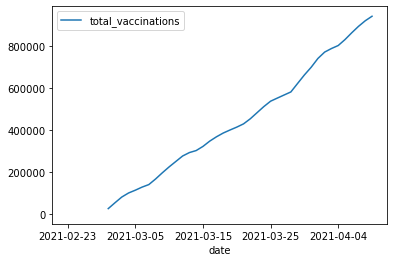

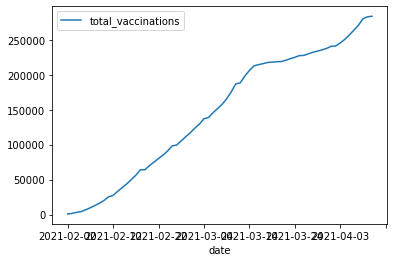

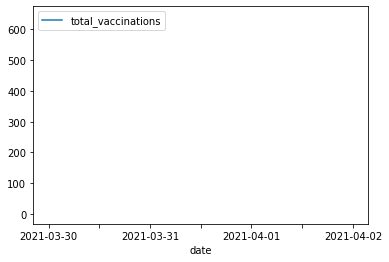

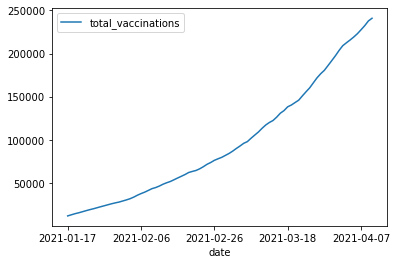

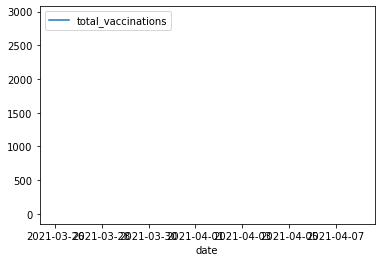

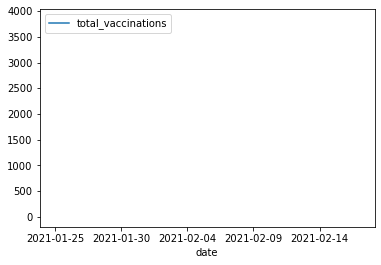

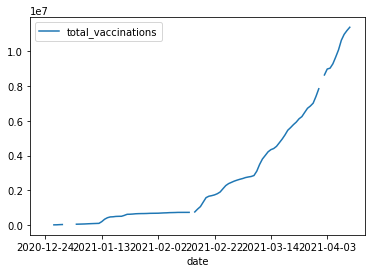

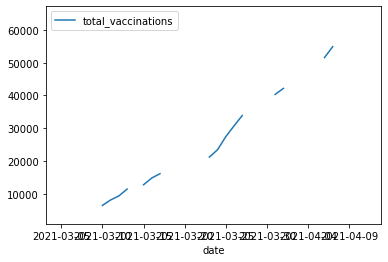

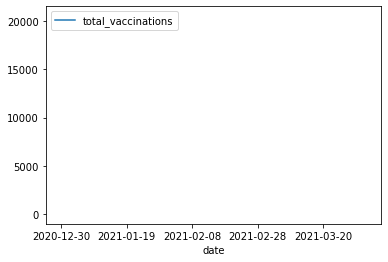

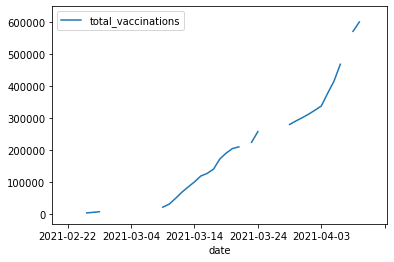

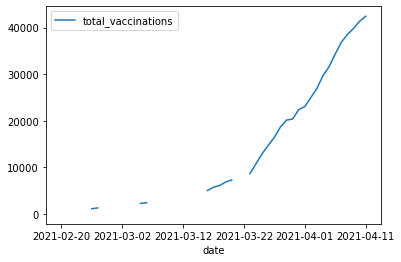

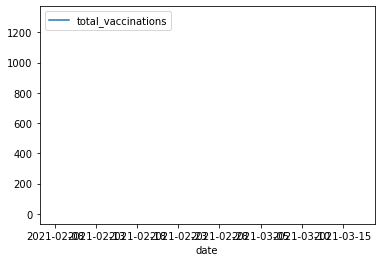

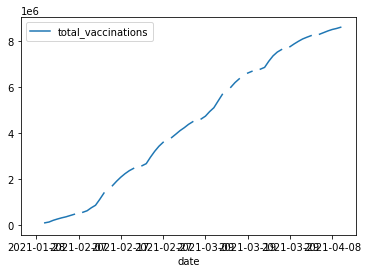

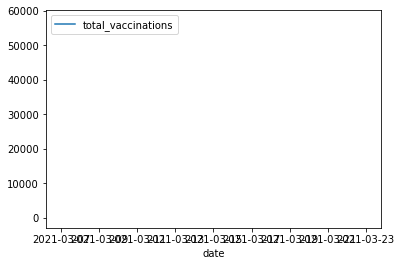

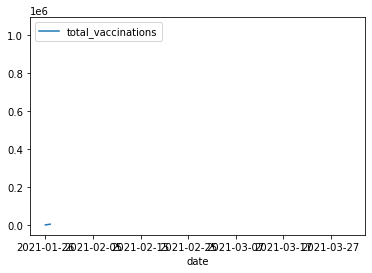

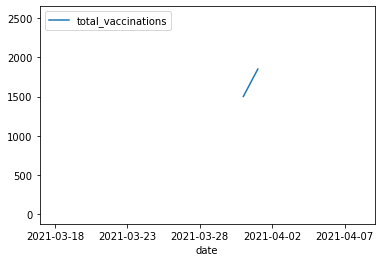

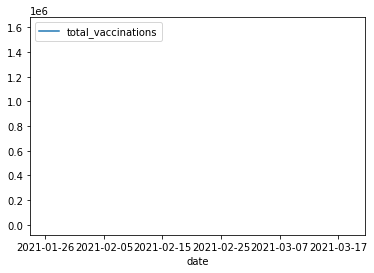

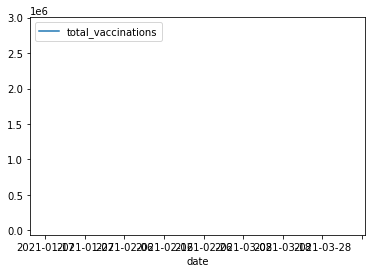

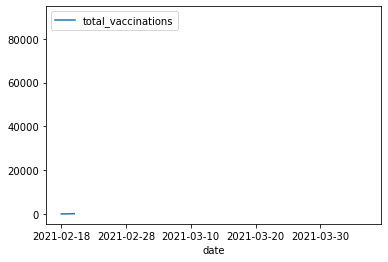

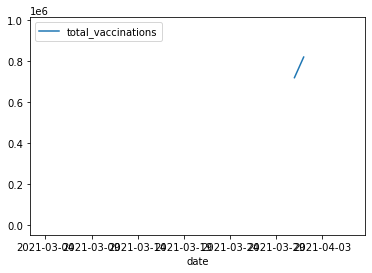

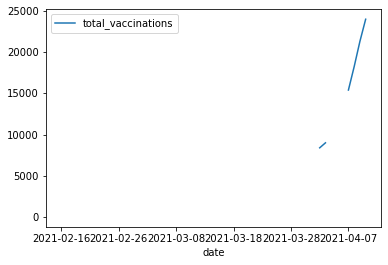

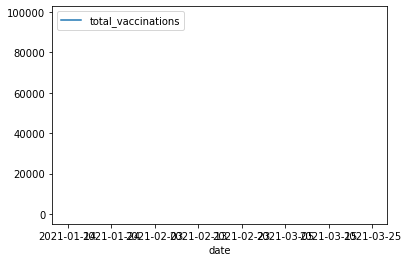

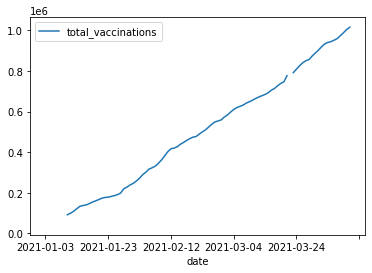

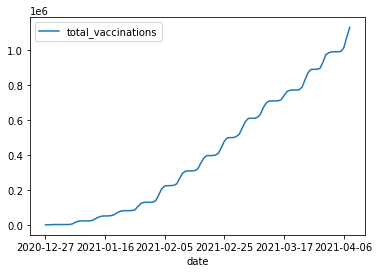

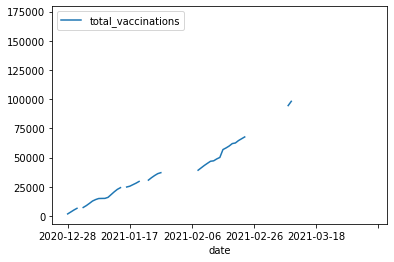

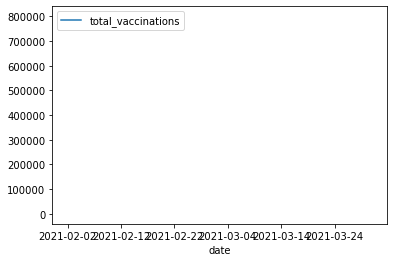

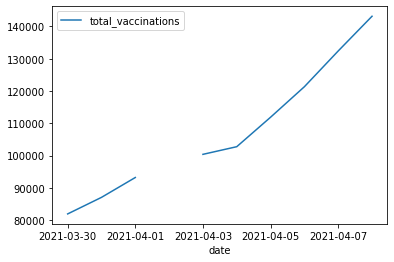

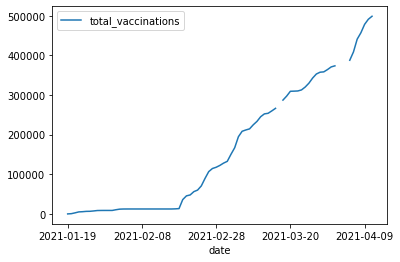

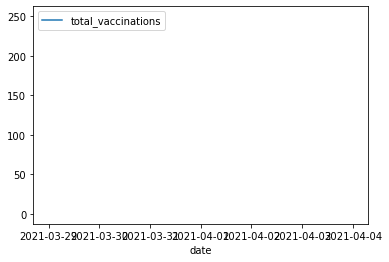

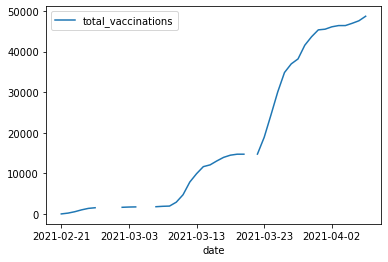

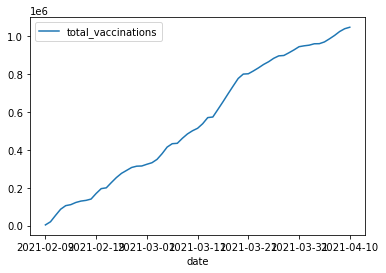

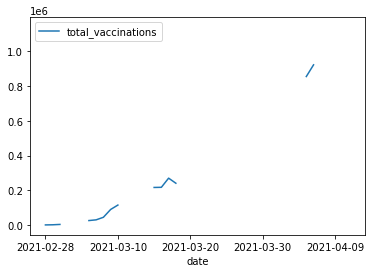

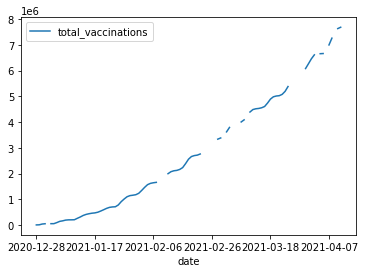

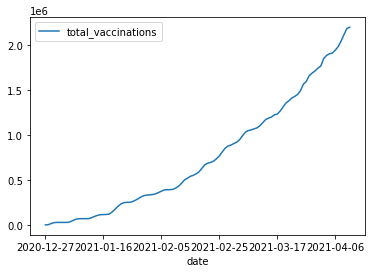

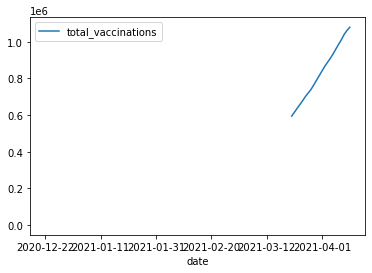

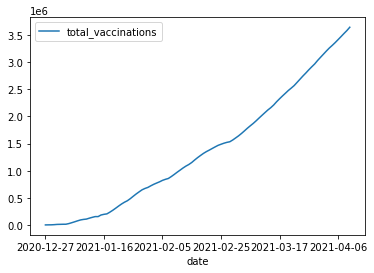

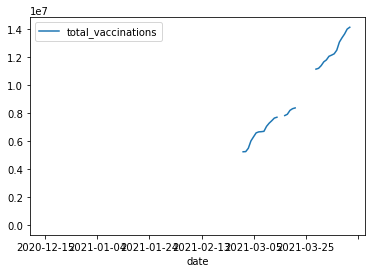

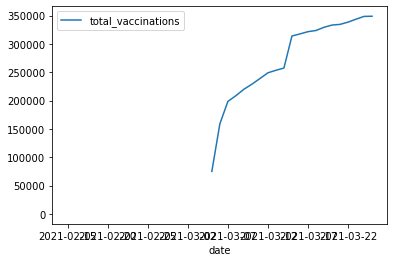

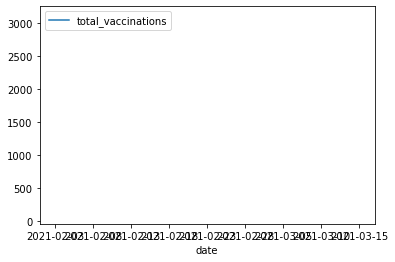

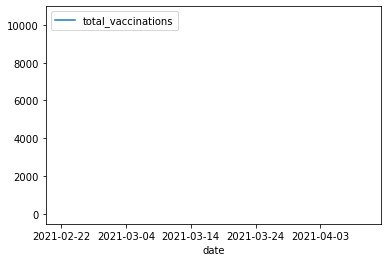

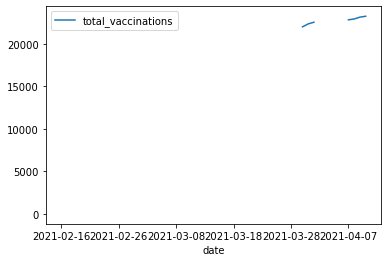

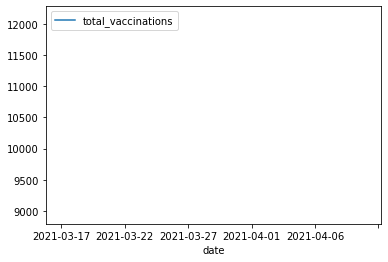

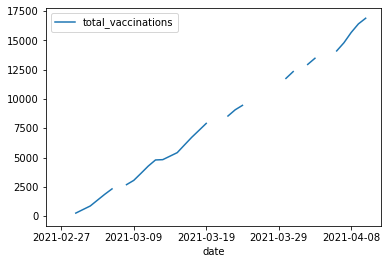

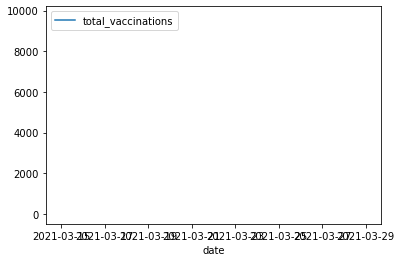

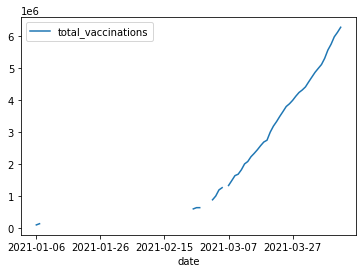

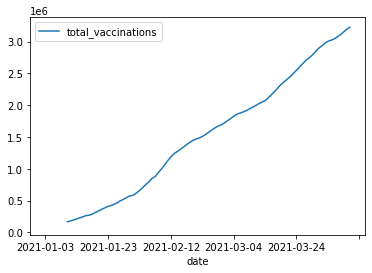

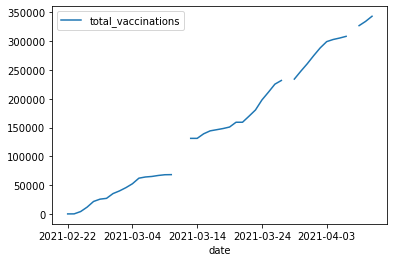

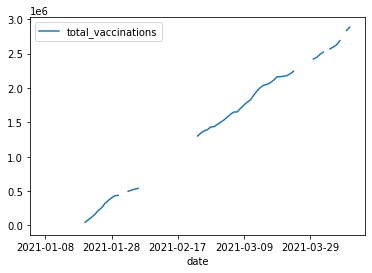

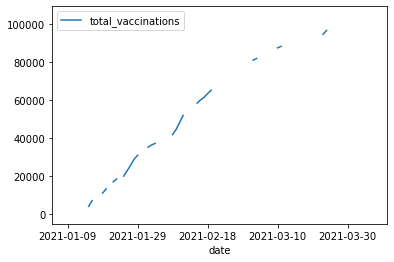

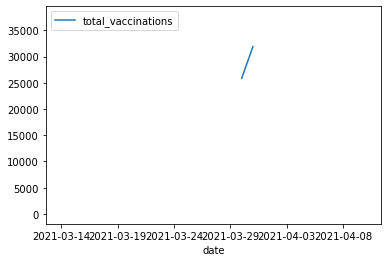

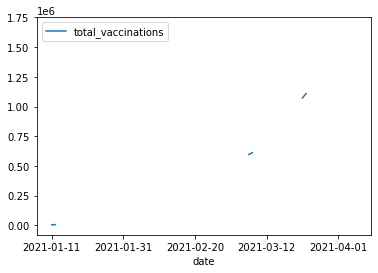

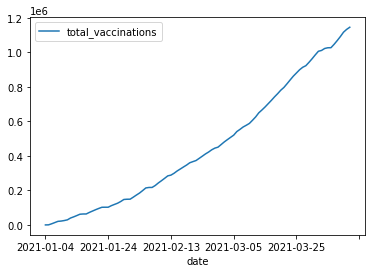

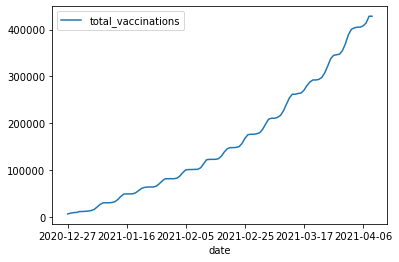

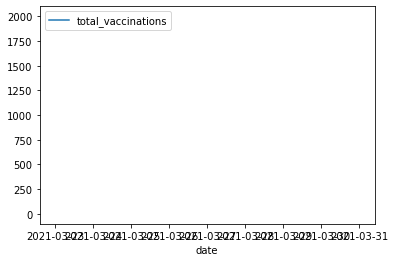

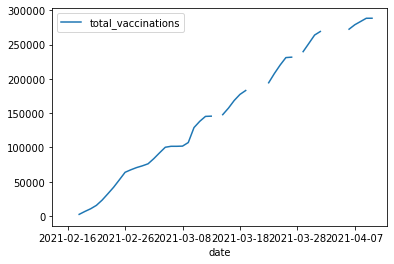

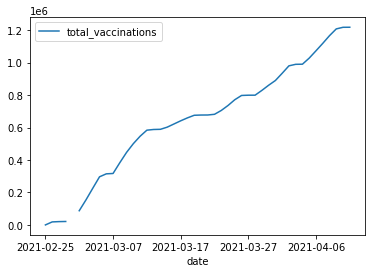

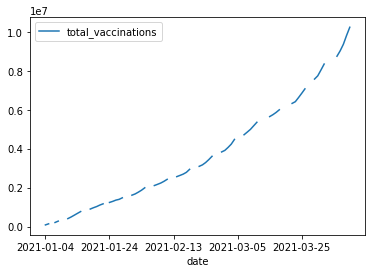

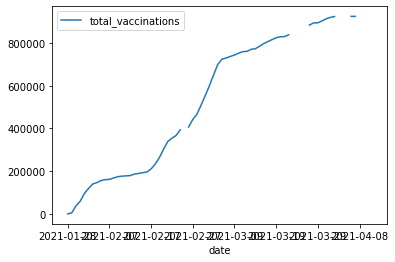

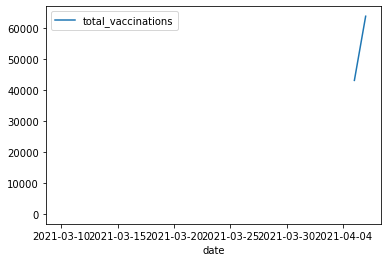

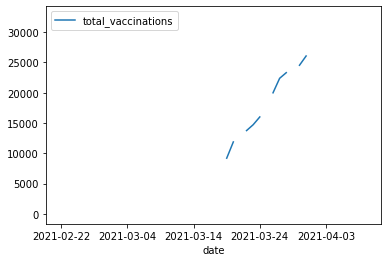

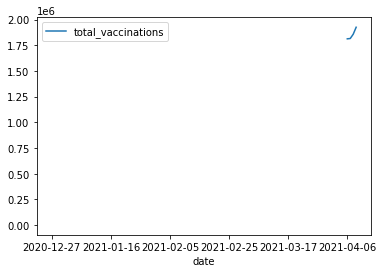

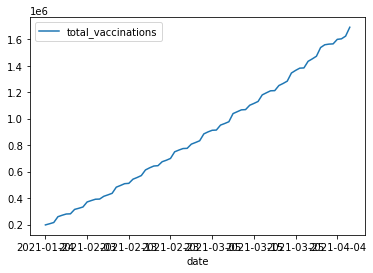

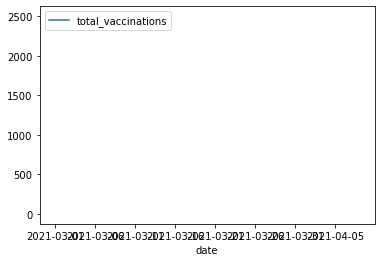

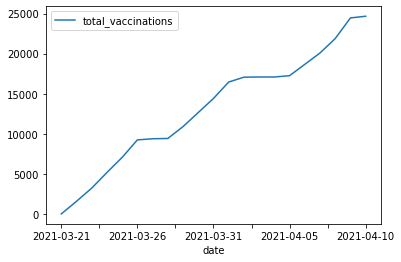

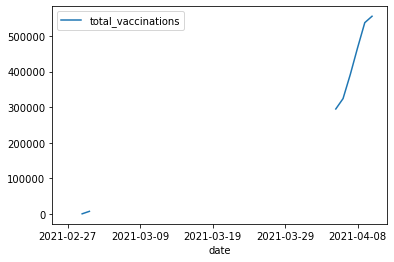

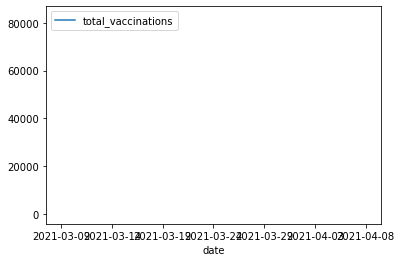

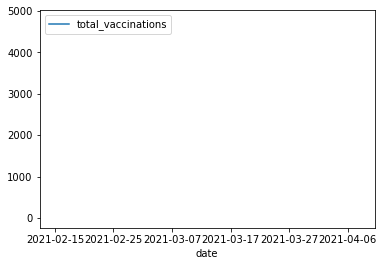

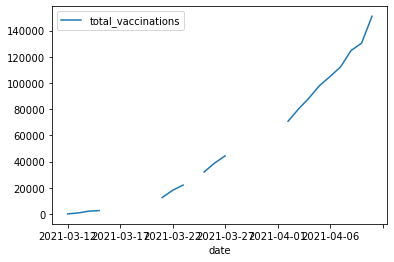

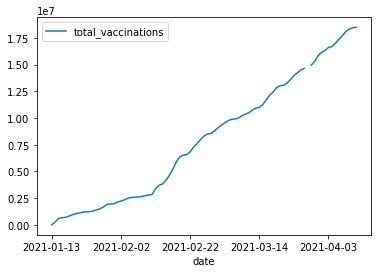

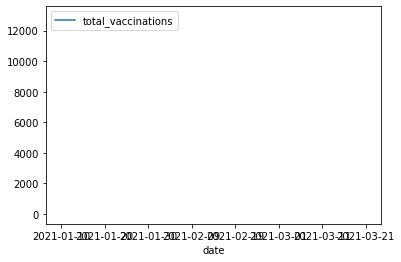

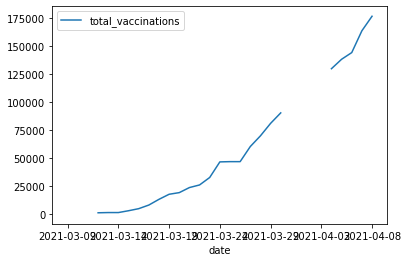

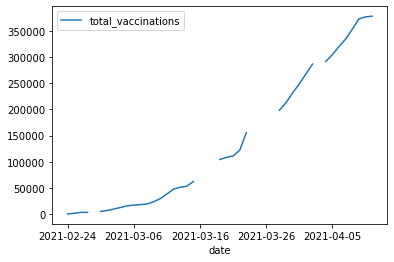

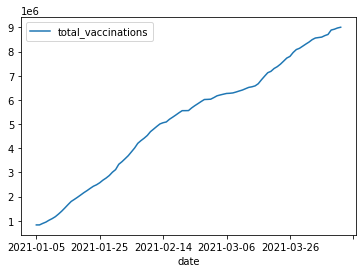

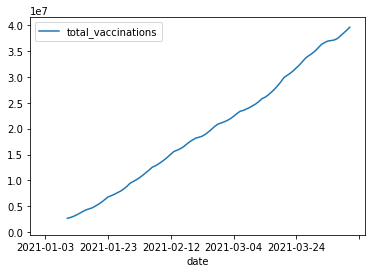

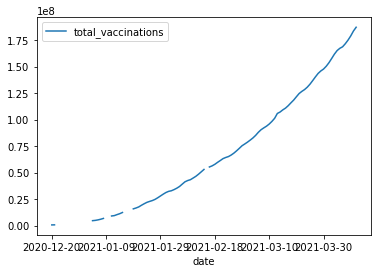

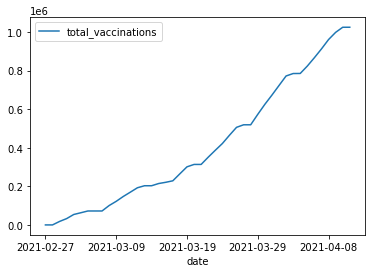

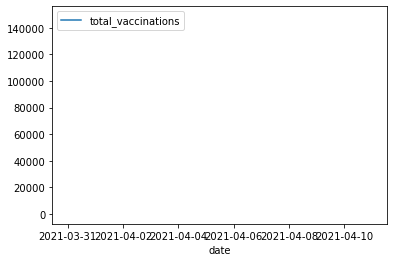

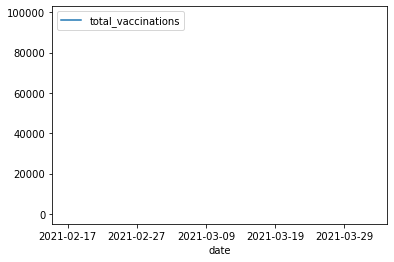

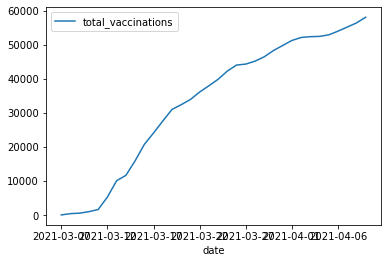

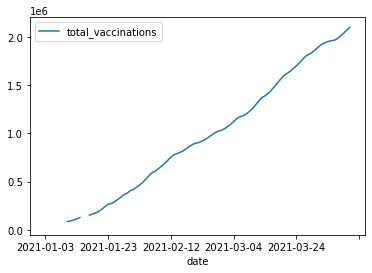

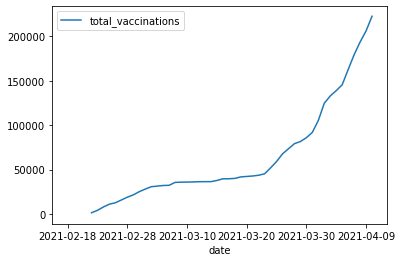

In [13]:
vac_prog_country.plot(x= 'date', y= 'total_vaccinations')

In [20]:
# Combined plot of people fully vaccinated against time, colour-coded for each country with x-axis range slider

import pandas as pd #Dataframes
import datetime # Incase datetime needs configuring
import plotly.graph_objects as go # Graphing
from plotly.subplots import make_subplots # Graphing
import plotly.express as px # Graphing

#Read unzipped csv data from github to avoid any local filepaths and repeated file downloads
df = pd.read_csv('https://raw.githubusercontent.com/AlexHumfrey/Python_Coursework/main/country_vaccinations.csv')

# Plot comined time series plot of people fully vaccinated against time, colour-coded for each country
fig = px.line(df, x=df['date'], y=df['people_fully_vaccinated'], color='country')
fig.update_layout(title = {'text': "Vaccine Progress by Country",'y':0.95,'x':0.45,'xanchor': 'center','yanchor': 'top'}
                  , yaxis = dict(title = 'People Vaccinated')
                  , xaxis = dict(title = ''), legend = dict(title = 'Countries'))

#x-axis sliders
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="Past Year", step="year", stepmode="backward"),
            dict(count=1, label="2021", step="year", stepmode="todate"),
            dict(label="All", step="all")])))

fig.show()